In [49]:
import numpy as np
import pandas as pd      # built on top of numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    # built on top of matplotlib
from pandas.api.types import CategoricalDtype # enables specifying categorical agetype below

from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#import sklearn.metrics as skm

In [50]:
df = pd.read_csv("diabetes_explore2.csv")

In [52]:
print(df.head())   

   preg  plas  pres  skin  insu  mass   pedi  age  class age_level
0     6   148    72    35     0  33.6  0.627   50      1       50s
1     1    85    66    29     0  26.6  0.351   31      0       30s
2     8   183    64     0     0  23.3  0.672   32      1       30s
3     1    89    66    23    94  28.1  0.167   21      0       20s
4     0   137    40    35   168  43.1  2.288   33      1       30s


In [53]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
preg         768 non-null int64
plas         768 non-null int64
pres         768 non-null int64
skin         768 non-null int64
insu         768 non-null int64
mass         768 non-null float64
pedi         768 non-null float64
age          768 non-null int64
class        768 non-null int64
age_level    768 non-null object
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [54]:
df.describe() #display mean, std, min, max

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
df.age_level.value_counts()

20s    396
30s    165
40s    118
50s     57
60+     32
Name: age_level, dtype: int64

In [56]:
df2 = df.copy(deep=True)
df2['plas']= df['plas'].replace(0,np.NaN)
df2['pres'] = df['pres'].replace(0,np.NaN)
df2['skin'] = df['skin'].replace(0,np.NaN)
df2['insu'] = df['insu'].replace(0, np.NaN)
df2['mass'] = df['mass'].replace(0, np.NaN)

In [58]:
##count how many NAs are in each column
plas_na = np.isnan(df2['plas']).sum()
print(plas_na , "NAs in plas")
pres_na = np.isnan(df2['pres']).sum()
print(pres_na , "NAs in pres")
skin_na = np.isnan(df2['skin']).sum()
print(skin_na , "NAs in skin")
insu_na = np.isnan(df2['insu']).sum()
print(insu_na , "NAs in insu")
mass_na = np.isnan(df2['mass']).sum()
print(plas_na , "NAs in mass")

5 NAs in plas
35 NAs in pres
227 NAs in skin
374 NAs in insu
5 NAs in mass


In [9]:
print (df2.info())  #int has been changed to float bc of NaN substitutions 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
preg         768 non-null int64
plas         763 non-null float64
pres         733 non-null float64
skin         541 non-null float64
insu         394 non-null float64
mass         757 non-null float64
pedi         768 non-null float64
age          768 non-null int64
class        768 non-null int64
age_level    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB
None


In [59]:
print (df2.median()) #calculate medians to compare with means

preg       3.0000
plas     117.0000
pres      72.0000
skin      29.0000
insu     125.0000
mass      32.3000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64


In [78]:
#print (df2.apply(np.nanmedian, axis = 0)) #calculate medians to compare with means
df2.describe() # shows means and medians

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [79]:
#predicting class
#dropping age level because ML can't take categorical variables and we already have age 
#as one of the variables 
X = df2.drop(labels=['class', 'age_level', 'insu'], axis=1)
print (X)
y = df2.loc[:,'class'] 
print (y)
print (y.unique())
X_col_names = X.columns.values
X_col_names

     preg   plas  pres  skin  mass   pedi  age
0       6  148.0  72.0  35.0  33.6  0.627   50
1       1   85.0  66.0  29.0  26.6  0.351   31
2       8  183.0  64.0   NaN  23.3  0.672   32
3       1   89.0  66.0  23.0  28.1  0.167   21
4       0  137.0  40.0  35.0  43.1  2.288   33
..    ...    ...   ...   ...   ...    ...  ...
763    10  101.0  76.0  48.0  32.9  0.171   63
764     2  122.0  70.0  27.0  36.8  0.340   27
765     5  121.0  72.0  23.0  26.2  0.245   30
766     1  126.0  60.0   NaN  30.1  0.349   47
767     1   93.0  70.0  31.0  30.4  0.315   23

[768 rows x 7 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64
[1 0]


array(['preg', 'plas', 'pres', 'skin', 'mass', 'pedi', 'age'],
      dtype=object)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

     preg   plas  pres  skin  mass   pedi  age
216     5  109.0  62.0  41.0  35.8  0.514   25
556     1   97.0  70.0  40.0  38.1  0.218   30
540     8  100.0  74.0  40.0  39.4  0.661   43
697     0   99.0   NaN   NaN  25.0  0.253   22
340     1  130.0  70.0  13.0  25.9  0.472   22
..    ...    ...   ...   ...   ...    ...  ...
721     1  114.0  66.0  36.0  38.1  0.289   21
326     1  122.0  64.0  32.0  35.1  0.692   30
712    10  129.0  62.0  36.0  41.2  0.441   38
137     0   93.0  60.0  25.0  28.7  0.532   22
645     2  157.0  74.0  35.0  39.4  0.134   30

[537 rows x 7 columns]
537 537
231 231


In [81]:
#imputing NaNs with mean
imp_x = Imputer(missing_values='NaN', strategy='mean', axis=0) 
X_train = imp_x.fit_transform(X_train)# # fit AND transform training set
X_test = imp_x.transform(X_test) # transform test set on scale fitted to training set

C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [82]:
svc = SVC(kernel='rbf', cache_size=1000, probability=True) 
print (svc)
clf = svc.fit(X_train,y_train) # trains the classifier on the training set
y_pred = svc.predict(X_test) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred)
print ("Prediction accuracy: ", pTot)
print (confusion_matrix(y_test, y_pred))

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Prediction accuracy:  0.6493506493506493
[[150   0]
 [ 81   0]]


C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [83]:
#scaling
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)# fit AND transform training set
X_test_minmax = min_max_scaler.transform(X_test)# test set transform only, no fit
X_test_minmax 

array([[0.        , 0.56493506, 0.45      , ..., 0.3907767 , 0.04794521,
        0.01666667],
       [0.        , 0.78571429, 0.75      , ..., 0.8276699 , 0.14683219,
        0.03333333],
       [0.41176471, 0.37662338, 0.55      , ..., 0.46116505, 0.05136986,
        0.4       ],
       ...,
       [0.05882353, 0.83116883, 0.475     , ..., 0.58737864, 0.26455479,
        0.11666667],
       [0.29411765, 0.74025974, 0.675     , ..., 0.51456311, 0.13313356,
        0.13333333],
       [0.23529412, 0.69480519, 0.75      , ..., 0.27912621, 0.08989726,
        0.25      ]])

In [85]:
svc = SVC(kernel='rbf', class_weight='balanced', cache_size=1000, probability=True)  
print (svc) 
clf = svc.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax = svc.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax)
print ("Prediction accuracy: ",pTot)

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Prediction accuracy:  0.7272727272727273


C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [86]:
cm = confusion_matrix(y_test, y_pred_minmax)
print (cm)
report = classification_report(y_test, y_pred_minmax)
print (report) #for each class prints: precision  recall  f1-score   support

[[117  33]
 [ 30  51]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       150
           1       0.61      0.63      0.62        81

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



In [33]:
probas_ = svc.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the prob of class 1 
roc_auc = auc(fpr, tpr)
print ("thresholds", thresholds)
print ("probas_", probas_)
print ("AUC using predict_proba", roc_auc)

thresholds [1.95996437 0.95996437 0.92322121 0.92112638 0.83521465 0.83043936
 0.75053315 0.7464388  0.74347359 0.73796357 0.72451346 0.71843816
 0.70332821 0.68880227 0.66346535 0.66113079 0.66041438 0.65101495
 0.58757164 0.57801753 0.57345798 0.54695181 0.5361274  0.52128776
 0.51111219 0.5        0.49310977 0.48722888 0.48077763 0.47936971
 0.47899509 0.46517105 0.46330252 0.45741757 0.42712761 0.40259562
 0.39957665 0.3612028  0.36067038 0.35861345 0.35764849 0.34399068
 0.33734153 0.33557355 0.33212698 0.32876139 0.32294063 0.32241038
 0.28909101 0.28685554 0.2795268  0.27581451 0.27398544 0.27260221
 0.26554273 0.2595989  0.25941124 0.24876451 0.24734087 0.22914808
 0.22131268 0.21455865 0.21032368 0.18560698 0.18440509 0.18309291
 0.18198079 0.16378305 0.15898309 0.1547086  0.14814776 0.13847087
 0.13777286 0.13218053 0.1317029  0.1307835  0.12823674 0.09897622
 0.09423708 0.04287698 0.04267321 0.01779659]
probas_ [[0.81694716 0.18305284]
 [0.25225291 0.74774709]
 [0.67123861 0

C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [34]:
%matplotlib inline

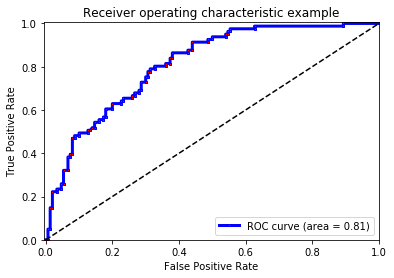

In [87]:
plt.figure()
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=4 ) # plot ROC curve, no marker
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [88]:
C_range = 10.0 ** np.arange(-2, 4)
#gamma_range = 10.0 ** np.arange(-3, 3)
gamma_range = [.01, .1, 1, 'auto', 10, 100]
print (gamma_range)
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid

[0.01, 0.1, 1, 'auto', 10, 100]


{'gamma': [0.01, 0.1, 1, 'auto', 10, 100],
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [89]:
# Default is 3-fold cross validation
grid = GridSearchCV(SVC(kernel='rbf',cache_size=1000, probability=True), param_grid=param_grid) 
#grid = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', cache_size=1000, probability=True), param_grid=param_grid) 
grid.fit(X_train_minmax, y_train)# run the grid search on the training data only
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print ("The best C and gamma for rbf is: %.5f, %.5f " % (best_C, best_gamma))
grid.best_estimator_

C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The best C and gamma for rbf is: 100.00000, 0.10000 


C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=100.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [90]:
best_predict_minmax = grid.best_estimator_.predict(X_test_minmax)
pTot = accuracy_score(y_test, best_predict_minmax)
print ("Prediction accuracy: ",pTot)
cm = confusion_matrix(y_test, best_predict_minmax)
print (cm)
report = classification_report(y_test, best_predict_minmax)
print (report) #for each class prints: precision  recall  f1-score   support

Prediction accuracy:  0.7445887445887446
[[132  18]
 [ 41  40]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       150
           1       0.69      0.49      0.58        81

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



In [91]:
test_svc = SVC(C=100, gamma='auto',kernel='rbf', cache_size=1000, probability=True) 
clf_test = test_svc.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax_test = test_svc.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax_test)
print ("Prediction accuracy: ",pTot)

Prediction accuracy:  0.7575757575757576


In [92]:
cm = confusion_matrix(y_test, y_pred_minmax_test)
print (cm)
report = classification_report(y_test, y_pred_minmax_test)
print (report) #for each class prints: precision  recall  f1-score   support

[[134  16]
 [ 40  41]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       150
           1       0.72      0.51      0.59        81

    accuracy                           0.76       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [93]:
probas_ = svc.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of class 1
roc_auc = auc(fpr, tpr)
print ("AUC using predict_proba", roc_auc)
probas_

AUC using predict_proba 0.8111522633744854


C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[0.81157008, 0.18842992],
       [0.26961552, 0.73038448],
       [0.67158496, 0.32841504],
       [0.96381689, 0.03618311],
       [0.60569534, 0.39430466],
       [0.76887649, 0.23112351],
       [0.09102915, 0.90897085],
       [0.5289009 , 0.4710991 ],
       [0.57840218, 0.42159782],
       [0.90616503, 0.09383497],
       [0.83506937, 0.16493063],
       [0.33381656, 0.66618344],
       [0.94516833, 0.05483167],
       [0.52184661, 0.47815339],
       [0.96418169, 0.03581831],
       [0.93539901, 0.06460099],
       [0.84752857, 0.15247143],
       [0.87980776, 0.12019224],
       [0.68254903, 0.31745097],
       [0.93985879, 0.06014121],
       [0.52925655, 0.47074345],
       [0.75224549, 0.24775451],
       [0.66343157, 0.33656843],
       [0.13057698, 0.86942302],
       [0.27385691, 0.72614309],
       [0.22979032, 0.77020968],
       [0.52756417, 0.47243583],
       [0.72223295, 0.27776705],
       [0.404692  , 0.595308  ],
       [0.5846021 , 0.4153979 ],
       [0.

In [94]:
#poly kernel degree 1 
svc2 = SVC(kernel='poly', cache_size=1000, degree = 1) 
print (svc2)
clf = svc2.fit(X_train,y_train) # trains the classifier on the training set
y_pred = svc2.predict(X_test) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred)
print ("Prediction accuracy: ", pTot)
print (confusion_matrix(y_test, y_pred))

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Prediction accuracy:  0.7489177489177489
[[132  18]
 [ 40  41]]


C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [101]:
#use scaled data
svc2 = SVC(kernel='poly', class_weight='balanced', cache_size=1000, degree = 1, probability = False) 
print (svc2) # calls SVC __str__ to view all the attibutes, including the default params you used
clf = svc2.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax = svc2.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax)
print ("Prediction accuracy: ",pTot)

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Prediction accuracy:  0.7316017316017316


C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [102]:
cm_poly = confusion_matrix(y_test, y_pred_minmax)
print (cm_poly)
report_poly = classification_report(y_test, y_pred_minmax)
print (report_poly) #for each class prints: precision  recall  f1-score   support

[[117  33]
 [ 29  52]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       150
           1       0.61      0.64      0.63        81

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



In [111]:
# Default is 3-fold cross validation
grid = GridSearchCV(SVC(kernel='poly',cache_size=1000, probability=False, degree = 1), param_grid=param_grid) 
grid.fit(X_train_minmax, y_train)# run the grid search on the training data only
best_C = grid.best_estimator_.C
print ("The best C for poly is: %.5f" % (best_C))
grid.best_estimator_

C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The best C for poly is: 0.01000


SVC(C=0.01, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=100, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
best_predict_minmax = grid.best_estimator_.predict(X_test_minmax)
pTot = accuracy_score(y_test, best_predict_minmax)
print ("Prediction accuracy: ",pTot)
cm = confusion_matrix(y_test, best_predict_minmax)
print (cm)
report = classification_report(y_test, best_predict_minmax)
print (report) #for each class prints: precision  recall  f1-score   support

Prediction accuracy:  0.7619047619047619
[[135  15]
 [ 40  41]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       150
           1       0.73      0.51      0.60        81

    accuracy                           0.76       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.76      0.76      0.75       231



In [113]:
test_svc = SVC(C=0.01, kernel='poly', cache_size=1000, probability=False) 
clf_test = test_svc.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax_test = test_svc.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax_test)
print ("Prediction accuracy: ",pTot)

Prediction accuracy:  0.6493506493506493


C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [114]:
cm = confusion_matrix(y_test, y_pred_minmax_test)
print (cm)
report = classification_report(y_test, y_pred_minmax_test)
print (report) #for each class prints: precision  recall  f1-score   support

[[150   0]
 [ 81   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       150
           1       0.00      0.00      0.00        81

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231



C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [96]:
#poly degree 2 
svc2 = SVC(kernel='poly', cache_size=1000, degree = 2) 
print (svc2)
clf = svc2.fit(X_train,y_train) # trains the classifier on the training set
y_pred = svc2.predict(X_test) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred)
print ("Prediction accuracy: ", pTot)
print (confusion_matrix(y_test, y_pred))

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Prediction accuracy:  0.7316017316017316
[[123  27]
 [ 35  46]]


In [117]:
#use scaled data
svc2 = SVC(kernel='poly', class_weight='balanced', cache_size=1000, degree = 2, probability = False) 
print (svc2) # calls SVC __str__ to view all the attibutes, including the default params you used
clf = svc2.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax = svc2.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax)
print ("Prediction accuracy: ",pTot)

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Prediction accuracy:  0.7186147186147186


C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [118]:
cm_poly = confusion_matrix(y_test, y_pred_minmax)
print (cm_poly)
report_poly = classification_report(y_test, y_pred_minmax)
print (report_poly) #for each class prints: precision  recall  f1-score   support

[[120  30]
 [ 35  46]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       150
           1       0.61      0.57      0.59        81

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.71      0.72      0.72       231



In [116]:
grid = GridSearchCV(SVC(kernel='poly',cache_size=1000, probability=False, degree = 2), param_grid=param_grid) 
grid.fit(X_train_minmax, y_train)# run the grid search on the training data only
best_C = grid.best_estimator_.C
print ("The best C for poly is: %.5f" % (best_C))
grid.best_estimator_

C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The best C for poly is: 1000.00000


SVC(C=1000.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [126]:
best_predict_minmax = grid.best_estimator_.predict(X_test_minmax)
pTot = accuracy_score(y_test, best_predict_minmax)
print ("Prediction accuracy: ",pTot)
cm = confusion_matrix(y_test, best_predict_minmax)
print (cm)
report = classification_report(y_test, best_predict_minmax)
print (report) #for each class prints: precision  recall  f1-score   support

Prediction accuracy:  0.7532467532467533
[[135  15]
 [ 42  39]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       150
           1       0.72      0.48      0.58        81

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231



In [127]:
test_svc = SVC(C=1000, kernel='poly', cache_size=1000, probability=False) 
clf_test = test_svc.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax_test = test_svc.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax_test)
print ("Prediction accuracy: ",pTot)

Prediction accuracy:  0.7575757575757576


C:\Users\sharo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [128]:
cm = confusion_matrix(y_test, y_pred_minmax_test)
print (cm)
report = classification_report(y_test, y_pred_minmax_test)
print (report) #for each class prints: precision  recall  f1-score   support

[[138  12]
 [ 44  37]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       150
           1       0.76      0.46      0.57        81

    accuracy                           0.76       231
   macro avg       0.76      0.69      0.70       231
weighted avg       0.76      0.76      0.74       231

